In [27]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
%matplotlib inline
np.random.seed(100)

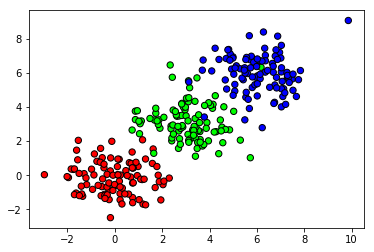

In [28]:
N = 100 # number of points per class
D = 2 # dimensionality
K = 3 # number of classes
X = np.zeros((N*K,D)) # data matrix (each row = single example)
y = np.zeros(N*K, dtype='uint8') # class labels
for j in range(K):
    ix = range(N*j,N*(j+1))
    X[ix] = np.random.normal(0.0 + 3*j, 1.0, N*2).reshape(N, 2) #Sample 200 points and then reshape (100, 2)
    y[ix] = j
# lets visualize the data:

cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=cmap_bold, edgecolor='k')
plt.show()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=100)


In [29]:
class kNN(object):
    def __init__(self):
        pass  #no weights to initialize
    def train(self, X, y):
        """ X is N x D where each row is an example. Y is 1-dimension of size N """
        # the nearest neighbor classifier simply remembers all the training data
        self.Xtr = X
        self.ytr = y
    def predict(self, X):
        """ X is N x D where each row is an example we wish to predict label for """
        num_test = X.shape[0]
        # lets make sure that the output type matches the input type
        Ypred = np.zeros(num_test, dtype = self.ytr.dtype)
        
        # loop over all test rows
        for i in range(num_test):
          # find the nearest training image to the i'th test image
          # using the L1 distance (sum of absolute value differences)
          distances = np.sum(np.abs(self.Xtr - X[i,:]), axis = 1)
          min_index = np.argmin(distances) # get the index with smallest distance
          Ypred[i] = self.ytr[min_index] # predict the label of the nearest example

        return Ypred

Accuracy : 96.96969696969697


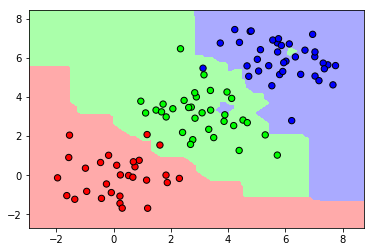

In [30]:
nn = kNN()
nn.train(X_train, y_train)
y_pred = nn.predict(X_test)
acc = np.mean(y_pred == y_test)
print('Accuracy :', acc*100.)

# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, x_max]x[y_min, y_max].
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

h = .02  # step size in the mesh
X = X_test
y = y_test

x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

# Put the result into a color plot
Z = nn.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.figure()
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

# Plot also the training points
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold,
            edgecolor='k', s=40)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.show()